# Open the data set from .csv file

Importing the modules.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Setting the current directory.

In [4]:
os.chdir("C:/Users/Giorgio/Desktop/Buildings python project/Data-driven simulation_Asnaashari - Casalicchio - Moretti")

Selecting the data set file and opening it in a Pandas data frame.

In [5]:
DataFolderPath = "C:/Users/Giorgio/Desktop/Buildings python project/Data-driven simulation_Asnaashari - Casalicchio - Moretti/data sets"
FileName = "energydata_complete.csv"
FilePath = DataFolderPath + "/" + FileName

DF_complete = pd.read_csv(FilePath, sep = ",", index_col = 0)
DF_complete.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


We have the following data:

- date time year-month-day hour:minute:second; 
- Appliances, energy use in Wh;
- lights, energy use of light fixtures in the house in Wh;
- T1, Temperature in kitchen area, in Celsius;
- RH_1, Humidity in kitchen area, in %;
- T2, Temperature in living room area, in Celsius;
- RH_2, Humidity in living room area, in %;
- T3, Temperature in laundry room area;
- RH_3, Humidity in laundry room area, in %;
- T4, Temperature in office room, in Celsius;
- RH_4, Humidity in office room, in %;
- T5, Temperature in bathroom, in Celsius;
- RH_5, Humidity in bathroom, in %;
- T6, Temperature outside the building (north side), in Celsius;
- RH_6, Humidity outside the building (north side), in %;
- T7, Temperature in ironing room , in Celsius;
- RH_7, Humidity in ironing room, in %;
- T8, Temperature in teenager room 2, in Celsius;
- RH_8, Humidity in teenager room 2, in %;
- T9, Temperature in parents room, in Celsius;
- RH_9, Humidity in parents room, in %;
- To, Temperature outside (from Chièvres weather station), in Celsius;
- Pressure (from Chièvres weather station), in mm Hg;
- RH_out, Humidity outside (from Chièvres weather station), in %;
- Windspeed (from Chièvres weather station), in m/s;
- Visibility (from Chièvres weather station), in km;
- Tdewpoint (from Chièvres weather station), °C;
- rv1, Random variable 1, nondimensional;
- rv2, Rnadom variable 2, nondimensional.

# Visualization of the data

We convert the index into a date-time object and we delete the cells with NaN value, if any.

In [6]:
PreviousIndex = DF_complete.index
ParsedIndex = pd.to_datetime(PreviousIndex)   
DF_complete.index = ParsedIndex

DF_cleaned = DF_complete.dropna()

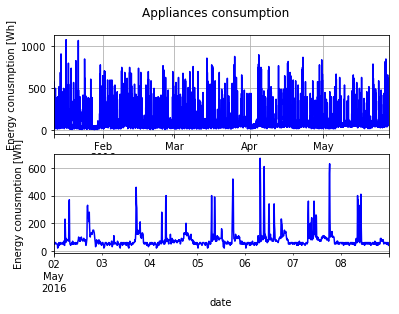

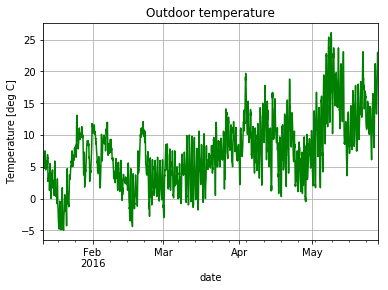

In [7]:
DF_chosenDates = DF_cleaned["2016-05-02":"2016-05-08"]

plt.figure()
plt.subplot(211)
DF_cleaned["Appliances"].plot(color = "b", grid = True)
plt.ylabel("Energy conusmption [Wh]")
plt.subplot(212)
DF_chosenDates["Appliances"].plot(color = "b", grid = True)
plt.ylabel("Energy conusmption [Wh]")
plt.suptitle("Appliances consumption")
plt.show()

plt.figure()
DF_cleaned["T_out"].plot(color = "g", grid = True)
plt.ylabel("Temperature [deg C]")
plt.title("Outdoor temperature")
plt.show()

# Predictions - building the final data set

We want to predict the appliaces consumption from the one of the previous 24 hour and the temperature of the previous 6 hours. 

For this purpose we create a new data frame with only the data we need.

In [8]:
DF_energyCons = DF_cleaned[["Appliances"]]
DF_temperature = DF_cleaned[["T_out"]]
DF_joined = DF_energyCons.join([DF_temperature])

we used pre-written functions for shifting the columns.

In [9]:
import useful_functions as uf

DF_finalDataSet = uf.lag_column10(DF_joined, "Appliances", 6*24)
DF_finalDataSet = uf.lag_column10(DF_joined, "T_out", 6*6)

DF_finalDataSet_cleaned = DF_finalDataSet.dropna()

We add also columns for hour, day, month, weekend/workday, day/night (with another pre-written function).

In [10]:
DF_finalDataSet_cleaned["hour"] = DF_finalDataSet_cleaned.index.hour
DF_finalDataSet_cleaned["day"] = DF_finalDataSet_cleaned.index.dayofweek   
DF_finalDataSet_cleaned["month"] = DF_finalDataSet_cleaned.index.month

DF_finalDataSet_cleaned['weekend'] = [uf.weekendDetector(thisDay) for thisDay in DF_finalDataSet_cleaned.index.dayofweek]
DF_finalDataSet_cleaned['day_night'] = [uf.dayDetector(thisHour) for thisHour in DF_finalDataSet_cleaned.index.hour]

DF_finalDataSet_cleaned.head(5) 

C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Appliances,T_out,Appliances-60min,Appliances-70min,Appliances-80min,Appliances-90min,Appliances-100min,Appliances-110min,Appliances-120min,Appliances-130min,...,T_out-320min,T_out-330min,T_out-340min,T_out-350min,T_out-360min,hour,day,month,weekend,day_night
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 17:00:00,60,6.500000,30.0,30.0,30.0,30.0,40.0,40.0,50.0,70.0,...,6.800000,6.700000,6.6,6.5,6.4,17,1,1,0,1
2016-01-12 17:10:00,60,6.316667,40.0,30.0,30.0,30.0,30.0,40.0,40.0,50.0,...,6.900000,6.800000,6.7,6.6,6.5,17,1,1,0,1
2016-01-12 17:20:00,210,6.133333,50.0,40.0,30.0,30.0,30.0,30.0,40.0,40.0,...,7.000000,6.900000,6.8,6.7,6.6,17,1,1,0,1
2016-01-12 17:30:00,380,5.950000,40.0,50.0,40.0,30.0,30.0,30.0,30.0,40.0,...,7.083333,7.000000,6.9,6.8,6.7,17,1,1,0,1
2016-01-12 17:40:00,370,5.766667,40.0,40.0,50.0,40.0,30.0,30.0,30.0,30.0,...,7.166667,7.083333,7.0,6.9,6.8,17,1,1,0,1


# Predictions - machine learning

Setting target (appliances consumption) and features (the others).

In [11]:
DF_target = DF_finalDataSet_cleaned[["Appliances"]]
DF_features = DF_finalDataSet_cleaned.drop("Appliances", axis = 1)  

Train - test split.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size = 0.2, random_state = 41234)

Linear regression model.

In [13]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
LinearPredictions_complete = linear_reg.predict(DF_features)

LinearPredictions_complete_DF = pd.DataFrame(LinearPredictions_complete, index = DF_finalDataSet_cleaned.index, columns = ["Appliances_predicted"])
LinearPredictions_final = DF_target.join(LinearPredictions_complete_DF)

Some statistics for the linear model.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_R2_score = r2_score(DF_target, LinearPredictions_final["Appliances_predicted"])
linear_mean_absolute_error = mean_absolute_error(DF_target,LinearPredictions_final["Appliances_predicted"])
linear_mean_squared_error = mean_squared_error(DF_target,LinearPredictions_final["Appliances_predicted"])
linear_coeff_variation = np.sqrt(linear_mean_squared_error)/DF_target["Appliances"].mean()

print "R2 = " + str(linear_R2_score)
print "MAE = " + str(linear_mean_absolute_error)
print "MSE = " + str(linear_mean_squared_error)
print "CV = " + str(linear_coeff_variation)

R2 = 0.237661215217
MAE = 48.1625316306
MSE = 8002.15691829
CV = 0.916095238539


Linear regression model with cross-validation.

In [15]:
from sklearn.model_selection import cross_val_predict
CV_LinearPredictions = cross_val_predict(linear_reg, DF_features, DF_target, cv = 10)
CV_LinearPredictions_DF = pd.DataFrame(CV_LinearPredictions, index = DF_target.index, columns=["Appliances_predicted_CV"])
final_CV_LinearPredictions_DF = DF_target.join(CV_LinearPredictions_DF)

CV_R2_score = r2_score(final_CV_LinearPredictions_DF["Appliances"],final_CV_LinearPredictions_DF["Appliances_predicted_CV"])
CV_mean_absolute_error = mean_absolute_error(final_CV_LinearPredictions_DF["Appliances"], final_CV_LinearPredictions_DF["Appliances_predicted_CV"])
CV_mean_squared_error = mean_squared_error(final_CV_LinearPredictions_DF["Appliances"], final_CV_LinearPredictions_DF["Appliances_predicted_CV"])
CV_coeff_variation = np.sqrt(CV_mean_squared_error)/final_CV_LinearPredictions_DF["Appliances"].mean()

print "R2 = " + str(CV_R2_score)
print "MAE = " + str(CV_mean_absolute_error)
print "MSE = " + str(CV_mean_squared_error)
print "CV = " + str(CV_coeff_variation)

R2 = 0.220114566653
MAE = 48.83766499
MSE = 8186.34148032
CV = 0.926578081174


Comparison between linear regression model with and without cross-validation.

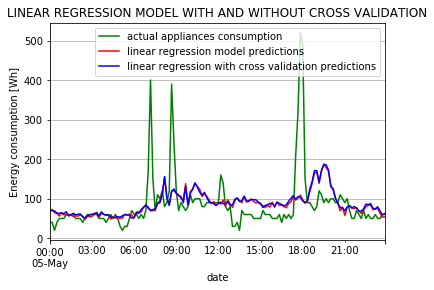

In [16]:
compare = LinearPredictions_final.join(CV_LinearPredictions_DF)

compare['2016-05-05'].plot(color = ("g","r","b"))
plt.title("LINEAR REGRESSION MODEL WITH AND WITHOUT CROSS VALIDATION")
plt.ylabel("Energy consumption [Wh]")
plt.grid()
plt.legend(('actual appliances consumption', 'linear regression model predictions',  'linear regression with cross validation predictions'))
plt.show()

The linear model cannot fit well our data because there are some peaks of consumption that are not possible to remove, since the data set provides the overall consumption of the appliances and not the single one. So we try a more complex algorithm for the regression: the Random Forest regression.

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()

CV_RF_predictions = cross_val_predict(reg_RF, DF_features, DF_target, cv = 10)
CV_RF_predictions_DF = pd.DataFrame(CV_RF_predictions, index = DF_target.index, columns = ["Appliances_predicted_RF"])
final_CV_RF_predictions_DF = DF_target.join(CV_RF_predictions_DF)

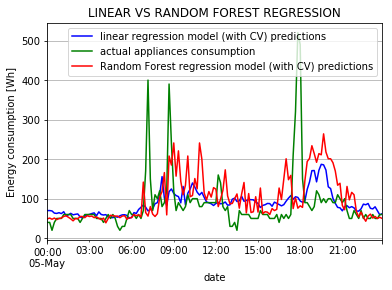

In [20]:
compare_RF = CV_LinearPredictions_DF.join(final_CV_RF_predictions_DF)

compare_RF['2016-05-05'].plot(color = ("b","g","r"))
plt.title("LINEAR VS RANDOM FOREST REGRESSION")
plt.ylabel("Energy consumption [Wh]")
plt.grid()
plt.legend(('linear regression model (with CV) predictions', 'actual appliances consumption',  'Random Forest regression model (with CV) predictions'))
plt.show()

We also tried the linear regression model (with cross-validation) using all the features in the original data set without the consumption and temperature lagged in time.

In [17]:
DF_final_original = DF_complete.dropna()
        
DF_final_original["hour"] = DF_final_original.index.hour
DF_final_original["day"] = DF_final_original.index.dayofweek   
DF_final_original["month"] = DF_final_original.index.month

DF_final_original['weekend'] = [uf.weekendDetector(thisDay) for thisDay in DF_final_original.index.dayofweek]
DF_final_original['day_night'] = [uf.dayDetector(thisHour) for thisHour in DF_final_original.index.hour] 

DF_final_original.dropna(inplace = True)
DF_final_original.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day,month,weekend,day_night
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.3,13.275433,13.275433,17,0,1,0,1
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.2,18.606195,18.606195,17,0,1,0,1
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.1,28.642668,28.642668,17,0,1,0,1
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.0,45.410389,45.410389,17,0,1,0,1
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.9,10.084097,10.084097,17,0,1,0,1


In [22]:
DF_target2 = DF_final_original[["Appliances"]]
DF_features2 = DF_final_original.drop("Appliances", axis = 1)   

X_train2, X_test2, y_train2, y_test2 = train_test_split(DF_features2, DF_target2, test_size = 0.2, random_state = 41234)

linear_reg2 = linear_model.LinearRegression()

CV_LinearPredictions2 = cross_val_predict(linear_reg2, DF_features2, DF_target2, cv = 10)
CV_LinearPredictions_DF2 = pd.DataFrame(CV_LinearPredictions2, index = DF_target2.index, columns=["Appliances_predicted_CV2"])
final_CV_LinearPredictions_DF2 = CV_LinearPredictions_DF2.join(DF_target2)

CV_R2_score_original = r2_score(final_CV_LinearPredictions_DF2["Appliances"],final_CV_LinearPredictions_DF2["Appliances_predicted_CV2"])
CV_mean_absolute_error_original = mean_absolute_error(final_CV_LinearPredictions_DF2["Appliances"], final_CV_LinearPredictions_DF2["Appliances_predicted_CV2"])
CV_mean_squared_error_original = mean_squared_error(final_CV_LinearPredictions_DF2["Appliances"], final_CV_LinearPredictions_DF2["Appliances_predicted_CV2"])
CV_coeff_variation_original = np.sqrt(CV_mean_squared_error)/final_CV_LinearPredictions_DF2["Appliances"].mean()

print "R2 = " + str(CV_R2_score_original)
print "MAE = " + str(CV_mean_absolute_error_original)
print "MSE = " + str(CV_mean_squared_error_original)
print "CV = " + str(CV_coeff_variation_original)

R2 = 0.144172201929
MAE = 54.4212027792
MSE = 8995.45241131
CV = 0.926131758101


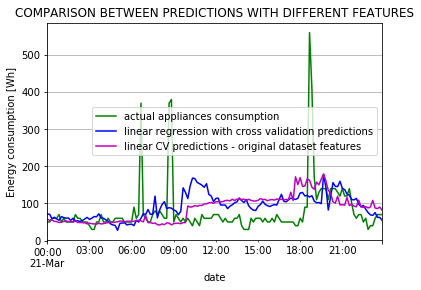

In [23]:
compare_features = final_CV_LinearPredictions_DF.join(CV_LinearPredictions_DF2)

compare_features['2016-03-021'].plot(color = ("g","b","m"))
plt.title("COMPARISON BETWEEN PREDICTIONS WITH DIFFERENT FEATURES")
plt.ylabel("Energy consumption [Wh]")
plt.legend(('actual appliances consumption', 'linear regression with cross validation predictions', 'linear CV predictions - original dataset features'))
plt.grid()
plt.show()

# Conclusions

This data set had some problems. 
First of all, the data are provided on 10 minutes basis and make predictions knowing the consumption just 10 minutes before is not worth it.
Secondly, the appliances' consumption is given without differentiating the sources that consume energy. This makes the predictions less accurate because there are some sudden peaks of consumption that are difficult to manage and can cause errors in the regression model.
Finally, the data set covers a time interval of 6 months, from January 2016 to May 2016 and during this period the maximum temperarure reached is around 25 °C, so the consumption is not directly related to HVAC system.
Furthermore, we have a R2 score that is very small and this means that the correlation between our target and features is not linear at all. Hence, the linear model does not fit properly the data, and making predictions with it leads to errors.